In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import plotly.express as px
from utils import *

In [3]:
# Load CSVs
standard_csv = Path("ising_model_sweep_data.csv")
qdrift_csv = Path("qdrift_ising_model_sweep_data2.csv")
qdrift_csv_more_random = Path("qdrift_ising_model_sweep_data_more_random.csv")

standard_qpe_df = pd.read_csv(standard_csv)
qdrift_qpe_df = pd.read_csv(qdrift_csv)
qdrift_qpe_df_more_random = pd.read_csv(qdrift_csv_more_random)

In [ ]:

def error_upper_bound_worst_case(n, t: float, lam, N):

    return np.sqrt(n * t ** 2 * lam ** 2 / N)

def error_upper_bound_average_case(n, t: float, lam, N):
    return np.ceil((2 * lam ** 2 * t ** 2) / N)


def _get_info_box(df, true_eigenval):
    alpha = df["Alpha"].iloc[0]
    hamiltonian_type = df["type of Hamiltonian"].iloc[0] if "type of Hamiltonian" in df.columns else "N/A"
    seed = df["Seed"].iloc[0] if "Seed" in df.columns else "N/A"

    # Format table text as string
    table_str = (
        f"<b>True Eigenvalue:</b> {true_eigenval:.5f}<br>"
        f"<b>Alpha:</b> {alpha}<br>"
        f"<b>Hamiltonian:</b> {hamiltonian_type}<br>"
        f"<b>Seed:</b> {seed}"
    )
    return table_str

def plot_error_vs_time(df: pd.DataFrame, title_suffix, true_eigenval):
    fig_scatter = px.scatter(
        df,
        x="Time",
        y="Eigenvalue Error",
        color="Num Ancilla",
        title=f"Eigenvalue Error vs Time (Scatter Plot) {title_suffix}",
        labels={"Eigenvalue Error": "Error", "Num Qubits": "# Qubits"},
    )


    # Add info box
    fig_scatter.add_annotation(
        text=_get_info_box(df, true_eigenval),
        xref="paper",
        yref="paper",
        x=1.02,  # just to the right of the plot
        y=1.3,
        showarrow=False,
        align="left",
        bordercolor="#1f77b4",
        borderwidth=2,
        bgcolor="#f5f5f5",
        font=dict(size=12),
    )

    fig_scatter.update_layout(
        xaxis_title="Simulation Time",
        yaxis_title="Eigenvalue Estimation Error",
        legend_title="Number of Ancilla Qubits",
        margin=dict(r=120)  # extra space for info box
    )

    fig_scatter.show()

def loglog_error_vs_time(df: pd.DataFrame, title_suffix, true_eigenval):
    fig_loglog = px.scatter(
        df,
        x="Time",
        y="Eigenvalue Error",
        color="Num Ancilla",
        log_x=True,
        log_y=True,
        title=f"Eigenvalue Error vs Time (Log-Log Plot) {title_suffix}",
        labels={"Eigenvalue Error": "Error", "Num Qubits": "# Qubits"},
    )

    fig_loglog.add_annotation(
        text=_get_info_box(df, true_eigenval),
        xref="paper",
        yref="paper",
        x=1.02,
        y=1.3,
        showarrow=False,
        align="left",
        bordercolor="#2ca02c",
        borderwidth=2,
        bgcolor="#f0fff0",
        font=dict(size=12),
    )

    fig_loglog.update_layout(
        xaxis_title="Simulation Time (log)",
        yaxis_title="Eigenvalue Estimation Error (log)",
        legend_title="Number of Ancilla Qubits",
        margin=dict(r=120)
    )

    fig_loglog.show()
def plot_error_vs_ancilla(df: pd.DataFrame, title_suffix=""):
    fig = px.box(
        df,
        x="Num Ancilla",
        y="Eigenvalue Error",
        points="all",
        title=f"Error vs Number of Ancilla Qubits {title_suffix}",
        labels={"Num Ancilla": "# Ancilla Qubits", "Eigenvalue Error": "Eigenvalue Estimation Error"},
    )
    fig.show()

def plot_3d_relationship(df: pd.DataFrame, title_suffix=""):
    fig = px.scatter_3d(
        df,
        x="Time",
        y="Num Ancilla",
        z="Eigenvalue Error",
        color="Eigenvalue Error",
        title=f"3D Plot of Error vs Time vs Ancilla Qubits {title_suffix}",
        labels={"Time": "Simulation Time", "Num Ancilla": "# Ancilla Qubits", "Eigenvalue Error": "Error"},
    )
    fig.show()


In [5]:
# lets start with standard qpe
exact_eigenvalue = 2.4
plot_error_vs_time(standard_qpe_df, "Standard QPE", exact_eigenvalue)

In [6]:
# now qdrift qpe
exponential_invocations = qdrift_qpe_df[qdrift_qpe_df["QDRIFT Implementation"] == "exponential invocations of qdrift channel"]
plot_error_vs_time(exponential_invocations, "qDRIFT-QPE: exponential invocations of qDRIFT channel", exact_eigenvalue)

In [7]:
linear_invocations = qdrift_qpe_df[qdrift_qpe_df["QDRIFT Implementation"] == "linear invocations of qdrift channel"]
plot_error_vs_time(linear_invocations, "qDRIFT-QPE: linear invocations of qDRIFT channel", exact_eigenvalue)

In [8]:
loglog_error_vs_time(exponential_invocations, "qDRIFT-QPE: exponential invocations of qdrift channel", exact_eigenvalue)

In [9]:
exact_eigenvalue = 2.4
exponential_invocations_more_random = qdrift_qpe_df_more_random[qdrift_qpe_df_more_random["QDRIFT Implementation"] == "exponential invocations of qdrift channel"]
plot_error_vs_time(exponential_invocations_more_random, "qDRIFT-QPE: exponential invocations of qdrift channel (more random)", exact_eigenvalue)

In [10]:
linear_invocations_more_random = qdrift_qpe_df_more_random[qdrift_qpe_df_more_random["QDRIFT Implementation"] == "linear invocations of qdrift channel"]
plot_error_vs_time(linear_invocations_more_random, "qDRIFT-QPE: linear invocations of qdrift channel (more random)", exact_eigenvalue)
loglog_error_vs_time(exponential_invocations_more_random, "qDRIFT-QPE: exponential invocations of qdrift channel (more random)", exact_eigenvalue)

# New experiments:
let $s$ be the number of times a given quantum circuit is executed. Let 
- instead of generating one random QPE circuit, and measuring it $s$ times, 
  we generate $s$ random QPE circuits, and measure each of them once. Test $s=1024$.
  - Also perfrorm every other test with the usual $s=1$.
- Test simpler Hamiltoninan $Z \otimes Z$
- change the distance between times from linear to logarithmic
- test two different time ranges: $[0, 1]$ and $[0, 0.1]$


In [11]:
qdrift_qpe_df_other_parameters = pd.read_csv("qdrift_ising_model_sweep_data_all_2025-06-05.csv")
expected_eigenvalue = 3.1240998703626572
for group in qdrift_qpe_df_other_parameters.groupby("Num Random Circuits"):
    num_random_circuits, group_df = group
    title_suffix = f"qDRIFT-QPE: {num_random_circuits} random circuits"
    smallest_error = group_df["Eigenvalue Error"].min()
    mean_error = group_df["Eigenvalue Error"].mean()
    stdev_error = group_df["Eigenvalue Error"].std()
    print(f"Num Random Circuits: {num_random_circuits}, Smallest Error: {smallest_error}, Mean Error: {mean_error}, Std Dev Error: {stdev_error}")
    plot_error_vs_time(group_df, title_suffix, expected_eigenvalue)


Num Random Circuits: 1, Smallest Error: 0.0010910339196947, Mean Error: 1.0771790073624576, Std Dev Error: 1.2283324549823527


Num Random Circuits: 1024, Smallest Error: 0.0023400833859725, Mean Error: 1.7360270759635847, Std Dev Error: 1.3589036944826907


New exp: run usual $s=1$ to generate $\tilde{\lambda}$, but perform triplicate and avergate results to get $\bar{\tilde{\lambda}}$

In [12]:
replicate_1_df = qdrift_qpe_df_other_parameters[qdrift_qpe_df_other_parameters["Num Random Circuits"] == 1]
replicate_2_df = pd.read_csv("replicate2_qdrift_ising_model_sweep_data_all_2025-06-11.csv")
replicate_3_df = pd.read_csv("replicate2_qdrift_ising_model_sweep_data_all_2025-06-11.csv")

plot_error_vs_time(replicate_1_df, "qDRIFT-QPE: replicate 1", expected_eigenvalue)
plot_error_vs_time(replicate_2_df, "qDRIFT-QPE: replicate 2", expected_eigenvalue)
plot_error_vs_time(replicate_3_df, "qDRIFT-QPE: replicate 3", expected_eigenvalue)

# now average and get error bars. Aggregate the data by Num Ancilla and Time
def aggregate_data(df: pd.DataFrame):
    return df.groupby(["Num Ancilla", "Time"]).agg(
        Mean_Error=("Eigenvalue Error", "mean"),
        Std_Dev_Error=("Eigenvalue Error", "std"),
        Min_Error=("Eigenvalue Error", "min"),
        Max_Error=("Eigenvalue Error", "max")
    ).reset_index()

aggregated_df = aggregate_data(pd.concat([replicate_1_df, replicate_2_df, replicate_3_df]))

# Plot the aggregated data with error bars
def plot_aggregated_error_vs_time(df: pd.DataFrame, title_suffix=""):
    fig = px.line(
        df,
        x="Time",
        y="Mean_Error",
        color="Num Ancilla",
        error_y="Std_Dev_Error",
        title=f"Aggregated Eigenvalue Error vs Time {title_suffix}",
        labels={"Mean_Error": "Mean Error", "Num Ancilla": "# Ancilla Qubits"},
    )
    fig.update_traces(mode='markers+lines')
    fig.add_hline(y=expected_eigenvalue, line_dash="dash", line_color="red", annotation_text="Magnitude of True Eigenvalue", annotation_position="top left")
    fig.update_layout(
        xaxis_title="Simulation Time",
        yaxis_title="Eigenvalue Estimation Error",
        legend_title="Number of Ancilla Qubits",
    )
    fig.show()
plot_aggregated_error_vs_time(aggregated_df, "qDRIFT-QPE: aggregated data from 3 replicates")



Hamiltonian Type: Ising, Smallest Error: 4.241103193969309e-06, Mean Error: 1.4583942735683968, Std Dev Error: 1.7122008995697293


c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



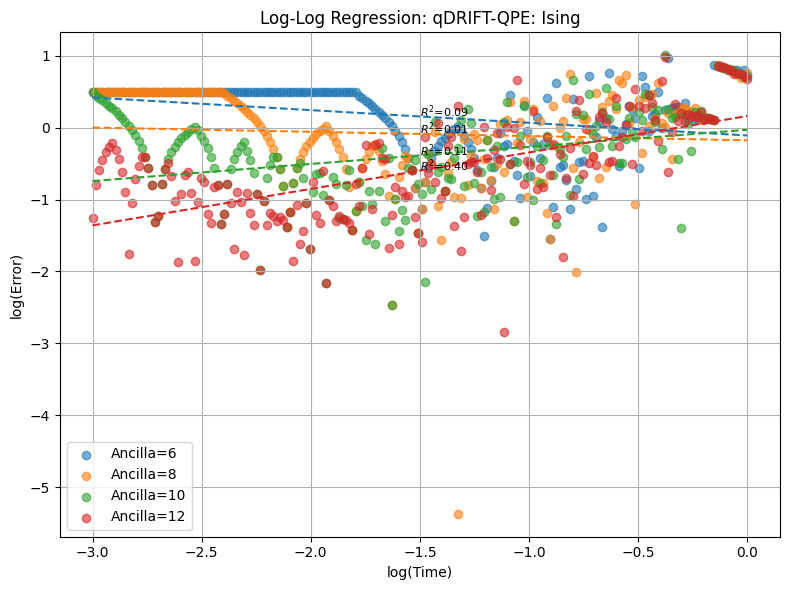

Hamiltonian Type: Simple Z, Smallest Error: 4.907440543266972e-06, Mean Error: 0.34324961950139765, Std Dev Error: 0.42695326133381756


c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



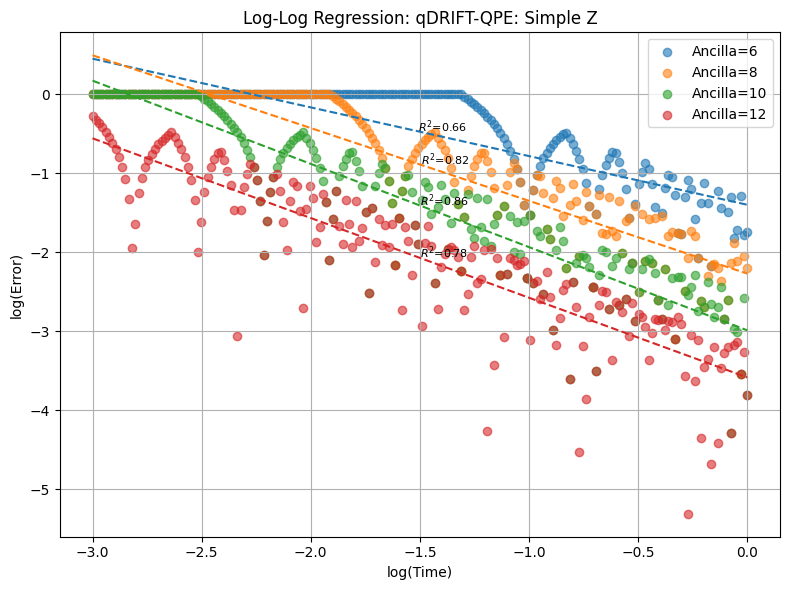

In [13]:
larger_time_df = pd.read_csv("qdrift_ising_model_sweep_data_all_2025-06-10.csv")
# importy the lib needed to parse strings as python objects
import ast
# now let's group by type of Hamiltonian
for hamiltonian_type, group_df in larger_time_df.groupby("type of Hamiltonian"):
    title_suffix = f"qDRIFT-QPE: {hamiltonian_type}"
    smallest_error = group_df["Eigenvalue Error"].min()
    mean_error = group_df["Eigenvalue Error"].mean()
    stdev_error = group_df["Eigenvalue Error"].std()
    print(f"Hamiltonian Type: {hamiltonian_type}, Smallest Error: {smallest_error}, Mean Error: {mean_error}, Std Dev Error: {stdev_error}")
    expected_eigenvalue = ast.literal_eval(group_df["Exact Eigenvalue"].iloc[0]).real
    plot_error_vs_time(group_df, title_suffix, expected_eigenvalue)
    loglog_error_vs_time(group_df, title_suffix, expected_eigenvalue)
    loglog_error_vs_time_with_regression(group_df, title_suffix, expected_eigenvalue)

Log log plot time
- 3 replicates of $t \in [0, 0.1]$
- 1 replicate of $t \in [0, 1]$

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



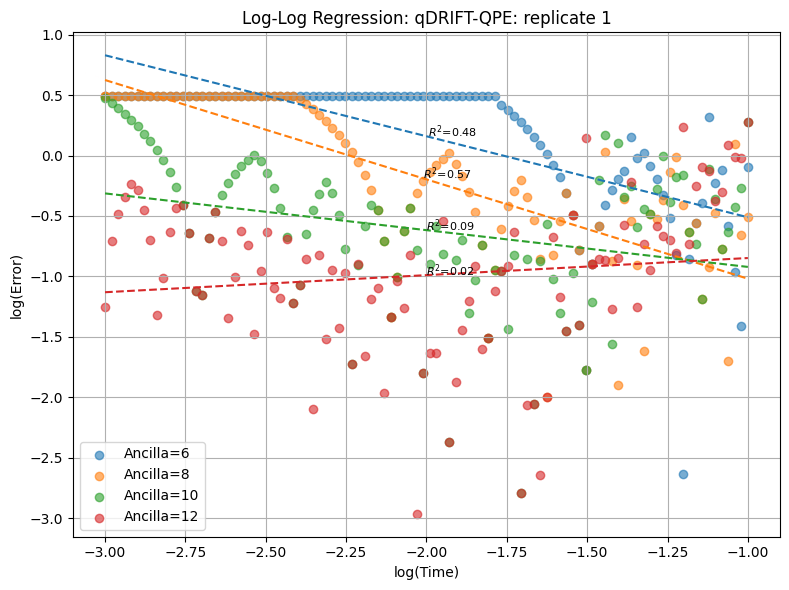

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



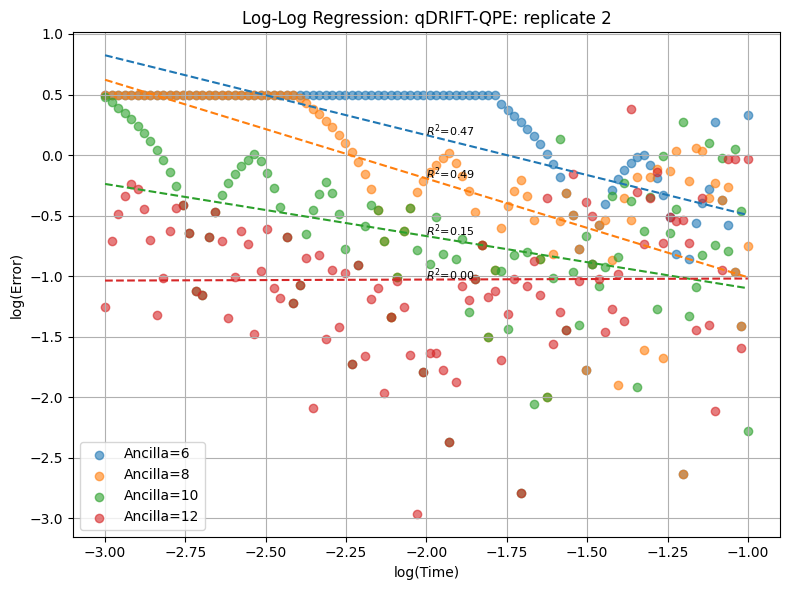

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



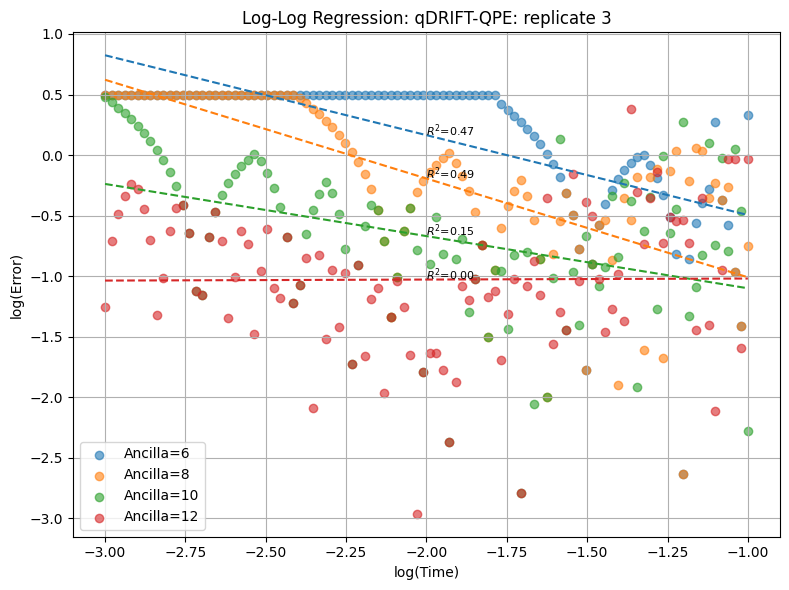

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



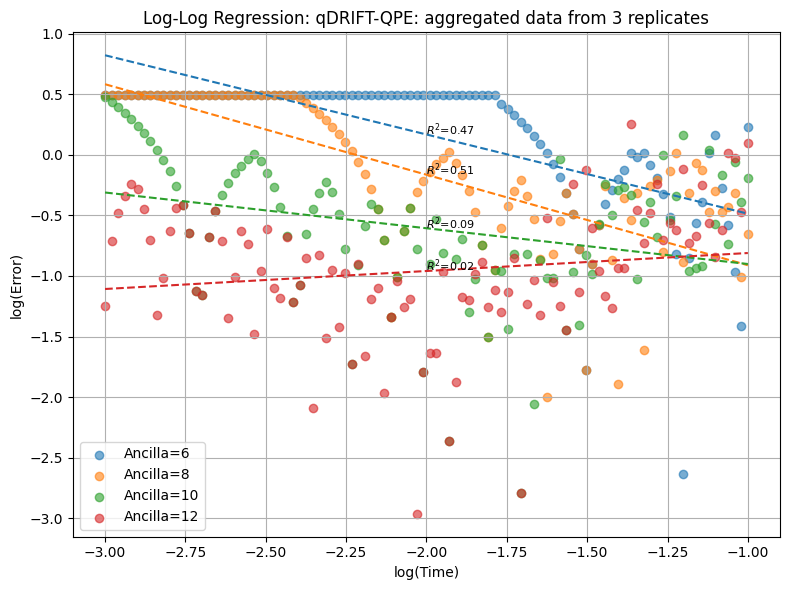

{6: 0.4698285984531554,
 8: 0.5074957898858447,
 10: 0.08848771544387013,
 12: 0.024374632294889342}

In [14]:
loglog_error_vs_time_with_regression(df=replicate_1_df, title_suffix="qDRIFT-QPE: replicate 1", true_eigenval=expected_eigenvalue)
loglog_error_vs_time_with_regression(df=replicate_2_df, title_suffix="qDRIFT-QPE: replicate 2", true_eigenval=expected_eigenvalue)
loglog_error_vs_time_with_regression(df=replicate_3_df, title_suffix="qDRIFT-QPE: replicate 3", true_eigenval=expected_eigenvalue)

# now the aggregated data
loglog_error_vs_time_with_regression(df=aggregated_df, title_suffix="qDRIFT-QPE: aggregated data from 3 replicates", true_eigenval=expected_eigenvalue, agg=True)

loglog plot of simple Z gate case

In [15]:
# Now let's plot the error vs number of ancilla


# Optimizing for the best time range

In [16]:
best_df, best_range, best_r2_12_qubits = search_best_time_interval_r2(
    aggregated_df,
    min_duration=0.05,
    title_suffix="qDRIFT-QPE: Best Time Interval Search",
    log_transform_data=True,
    show_plot=False,
    agg=True)




✅ Best R² sum = 0.5219 in interval (np.float64(0.0093260334688322), np.float64(0.1))


c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



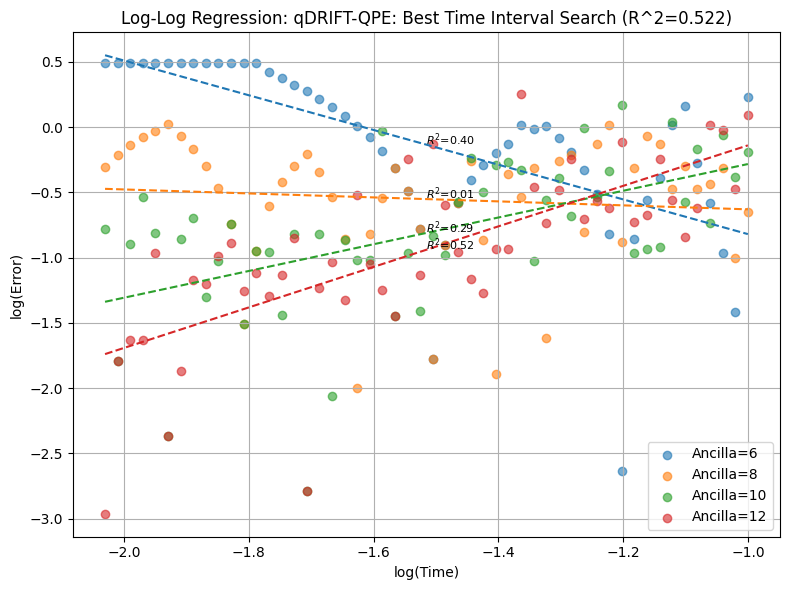

In [17]:
loglog_error_vs_time_with_regression(
    df=best_df,
    title_suffix=f"qDRIFT-QPE: Best Time Interval Search (R^2={best_r2_12_qubits:.3f})",
    true_eigenval=expected_eigenvalue,
    agg=True
)
plot_aggregated_error_vs_time(
    df=best_df,
    title_suffix=f"qDRIFT-QPE: Best Time Interval Search (R^2={best_r2_12_qubits:.3f})"
)


In [18]:
hoepfully_makking_qpe_error_negligible_df = qdrift_qpe_df_other_parameters[(qdrift_qpe_df_other_parameters["Num Shots per Circuit"] >= 1000) & 
                                                                           (qdrift_qpe_df_other_parameters["Num Ancilla"] ==6) & 
                                                                           (qdrift_qpe_df_other_parameters["Time"] >= 0.045)]
loglog_error_vs_time(hoepfully_makking_qpe_error_negligible_df, "qDRIFT-QPE: hopefully making QPE error negligible", expected_eigenvalue)

In [78]:
import pandas as pd
just_tryng_some_bs = pd.read_csv("qdrift_ising_model_sweep_ultimate_2025-06-14.csv")
expected_eigenvalue = 2.561249694973137
plot_error_vs_time(just_tryng_some_bs, "qDRIFT-QPE: just trying some bs", expected_eigenvalue)
loglog_error_vs_time(just_tryng_some_bs, "qDRIFT-QPE: just trying some bs", expected_eigenvalue)

In [82]:
just_tryng_some_bs2 = pd.read_csv("qdrift_ising_model_sweep_ultimate_2025-06-15.csv")
print(len(just_tryng_some_bs2))
loglog_error_vs_time(just_tryng_some_bs2, "qDRIFT-QPE: just trying some bs 2", expected_eigenvalue)
plot_error_vs_time(
    df=just_tryng_some_bs2,
    title_suffix="qDRIFT-QPE: just trying some bs 2",
    true_eigenval=expected_eigenvalue
)

399


In [ ]:
from typing import List, Tuple, Callable
from dataclasses import dataclass
import pandas as pd
import numpy as np
from functools import partial
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

T = Tuple[float, float, int]  # (x, y, original_index)

@dataclass
class RecursiveInfo:
    max_overall: float
    max_overall_slice: List[T]
    max_prefix: float
    max_prefix_slice: List[T]
    max_suffix: float
    max_suffix_slice: List[T]
    full_slice: List[T]


def dataframe_to_point_search_space_with_index(
    df: pd.DataFrame,
    x_col: str,
    y_col: str,
    sort_by_y: bool = True
) -> List[T]:
    points = [(row[x_col], row[y_col], idx) for idx, row in df.iterrows()]
    return sorted(points, key=lambda pt: pt[1]) if sort_by_y else points


def r2_of_points(points: List[T]) -> float:
    if len(points) < 2:
        return float('-inf')
    X = np.array([[x] for x, _, _ in points])
    y = np.array([y for _, y, _ in points])
    model = LinearRegression().fit(X, y)
    return r2_score(y, model.predict(X))


def base_case_eval_r2(search_space: List[T], min_length: int) -> RecursiveInfo:
    if len(search_space) < min_length:
        return RecursiveInfo(float('-inf'), [], float('-inf'), [], float('-inf'), [], search_space)
    val = r2_of_points(search_space)
    return RecursiveInfo(val, search_space, val, search_space, val, search_space, search_space)


def combine_r2_infos(left: RecursiveInfo, right: RecursiveInfo, min_length: int) -> RecursiveInfo:
    full = left.full_slice + right.full_slice

    cross = left.max_suffix_slice + right.max_prefix_slice
    cross_val = r2_of_points(cross) if len(cross) >= min_length else float('-inf')

    options = [
        (left.max_overall, left.max_overall_slice),
        (right.max_overall, right.max_overall_slice),
        (cross_val, cross)
    ]
    max_val, max_slice = max(options, key=lambda t: t[0])

    # Max prefix
    best_prefix, best_prefix_val = [], float('-inf')
    for i in range(min_length, len(full) + 1):
        segment = full[:i]
        val = r2_of_points(segment)
        if val > best_prefix_val:
            best_prefix_val = val
            best_prefix = segment

    # Max suffix
    best_suffix, best_suffix_val = [], float('-inf')
    for i in range(len(full) - min_length + 1):
        segment = full[i:]
        val = r2_of_points(segment)
        if val > best_suffix_val:
            best_suffix_val = val
            best_suffix = segment

    return RecursiveInfo(max_val, max_slice, best_prefix_val, best_prefix, best_suffix_val, best_suffix, full)


def generalized_max_substructure(
    search_space: List[T],
    partition_fn: Callable[[List[T]], Tuple[List[T], List[T]]],
    base_case_fn: Callable[[List[T]], bool],
    base_case_eval_fn: Callable[[List[T]], RecursiveInfo],
    combine_fn: Callable[[RecursiveInfo, RecursiveInfo], RecursiveInfo]
) -> RecursiveInfo:
    if base_case_fn(search_space):
        return base_case_eval_fn(search_space)

    left, right = partition_fn(search_space)
    left_info = generalized_max_substructure(left, partition_fn, base_case_fn, base_case_eval_fn, combine_fn)
    right_info = generalized_max_substructure(right, partition_fn, base_case_fn, base_case_eval_fn, combine_fn)
    return combine_fn(left_info, right_info)


def partition_by_y(points: List[T]) -> Tuple[List[T], List[T]]:
    mid = len(points) // 2
    return points[:mid], points[mid:]


def search_with_df_projection(
    df: pd.DataFrame,
    x_col: str,
    y_col: str,
    min_length: int = 3,
    sort_by_y: bool = True
) -> Tuple[pd.DataFrame, float, List[Tuple[float, float]]]:
    """
    Returns a tuple: (best_sub_dataframe, best_score, [(x, y), ...])
    """
    search_space = dataframe_to_point_search_space_with_index(df, x_col, y_col, sort_by_y)

    result = generalized_max_substructure(
        search_space=search_space,
        partition_fn=partition_by_y,
        base_case_fn=lambda s: len(s) <= 2 * min_length,
        base_case_eval_fn=partial(base_case_eval_r2, min_length=min_length),
        combine_fn=partial(combine_r2_infos, min_length=min_length)
    )

    indices = [idx for _, _, idx in result.max_overall_slice]
    best_df = df.loc[indices].sort_index()
    xy_projection = [(x, y) for x, y, _ in result.max_overall_slice]
    return best_df, result.max_overall, xy_projection


In [ ]:
just_tryng_some_bs2["Log Time"] = np.log10(just_tryng_some_bs2["Time"])
just_tryng_some_bs2["Log Eigenvalue Error"] = np.log10(just_tryng_some_bs2["Eigenvalue Error"])
just_tryng_some_bs2_sorted = just_tryng_some_bs2.sort_values("Time").reset_index()

bestest_r2 = - np.inf

for m in range(10, len(just_tryng_some_bs2)):
    best_df, best_r2, best_xy = search_with_df_projection(
        just_tryng_some_bs2_sorted,
        x_col="Log Time",
        y_col="Log Eigenvalue Error",
        min_length=m, sort_by_y=False
    )
    if best_r2 >= bestest_r2:
        print(f"prev best r2: {bestest_r2}, new best r2: {best_r2}")
        bestest_r2 = best_r2
        bestest_df = best_df

prev best r2: -inf, new best r2: 0.5045523239735004
prev best r2: 0.5045523239735004, new best r2: 0.5045523239735004
prev best r2: 0.5045523239735004, new best r2: 0.6057589160777537
prev best r2: 0.6057589160777537, new best r2: 0.6057589160777537
prev best r2: 0.6057589160777537, new best r2: 0.6057589160777537
prev best r2: 0.6057589160777537, new best r2: 0.6057589160777537
prev best r2: 0.6057589160777537, new best r2: 0.6057589160777537
prev best r2: 0.6057589160777537, new best r2: 0.6057589160777537
prev best r2: 0.6057589160777537, new best r2: 0.6057589160777537
prev best r2: 0.6057589160777537, new best r2: 0.6057589160777537
prev best r2: 0.6057589160777537, new best r2: 0.6057589160777537
prev best r2: 0.6057589160777537, new best r2: 0.6057589160777537
prev best r2: 0.6057589160777537, new best r2: 0.6057589160777537
prev best r2: 0.6057589160777537, new best r2: 0.6057589160777537
prev best r2: 0.6057589160777537, new best r2: 0.6057589160777537
prev best r2: 0.60575891

0.5451060593646206

c:\Users\Ro\Desktop\Quantum-Computing-Playground\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



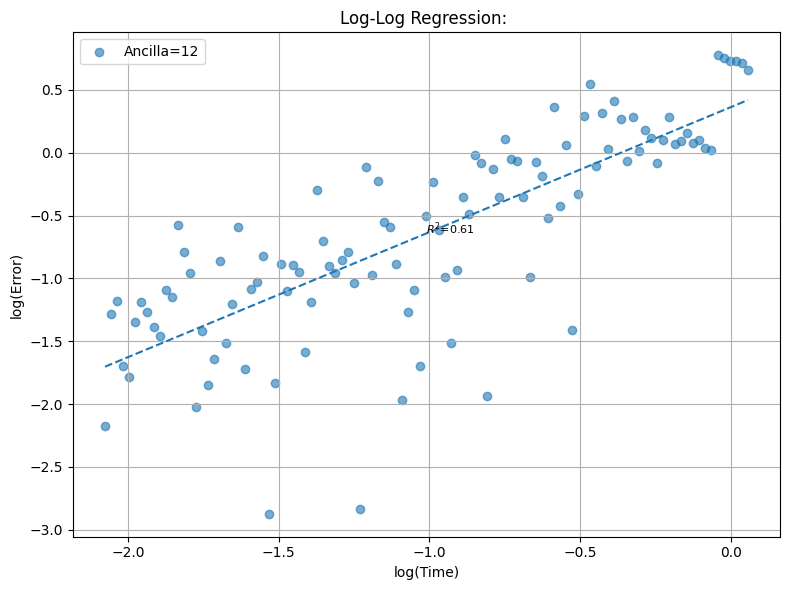

In [81]:
loglog_error_vs_time_with_regression(bestest_df, "")
loglog_error_vs_time(bestest_df, "", expected_eigenvalue)